# Práctica 03: Antenas de hilo

# Práctica 03: Antenas de hilo

In [1]:
%matplotlib notebook
import numpy as np  # cálculo numérico
import matplotlib.pyplot as plt  # gráficos
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors as mcolors
import scipy.special as sc


## Diagramas de radiación tridimensionales

Un dipolo alineado con el eje $z$ tiene un diagrama de
radiación normalizado $t(\theta,\phi)=\left[\frac{\cos\left(\frac{\pi}{2}\cos\theta\right)}{\sin\theta}\right]^2$.
- Para representarlo debemos crear una malla de puntos cubriendo los
  valores de $\theta$ y $\phi$ suministrados.
- Como $t(\theta,\phi)$ representa el alejamiento desde el origen de
  la superficie del diagrama, es decir son coordenadas $r$ en
  esféricas, tendremos las coordenadas de las esquinas de los parches
  de la malla en coordenadas esféricas
  ($r=t(\theta,\phi)$,$\theta$,$\phi$).
- Necesitamos pasar todas estas coordenadas ($r$,$\theta$,$\phi$) a
  cartesianas (x,y,z) para representar la superficie que se
  corresponde con el diagrama de radiación normalizado.

El objetivo de esta respuesta es obtener las matrices con las
coordenadas (x,y,z) de los nodos de la malla, de modo que puedan
alimentar directamente la función plot_surface de matplotlib para
representar la malla. $R=t(\theta,\phi)$ se usa para colorear los
parches.

In [2]:
def respuesta_01():
    # Muestras de theta y phi para crear la malla
    t = np.linspace(0, np.pi, 51)
    p = np.linspace(0, 2*np.pi, 51)
    # Edita a partir de aquí
    from numpy import cos, sin
    θ,ϕ = np.meshgrid(t,p)
    
    # Calculamos en escalar
    resc = lambda θ: (cos(np.pi/2*cos(θ))/sin(θ))**2 if (θ != 0 and θ != np.pi) else 0.0
    # Vectorizamos la matriz
    r=np.vectorize(resc)

    x = r(θ)*sin(θ)*cos(ϕ)
    y = r(θ)*sin(θ)*sin(ϕ)
    z = r(θ)*cos(θ)

    X,Y,Z,R= x,y,z,r(θ)

    return X,Y,Z,R
 
# Ejecuta la siguiente celda para dibujar tu respuesta

<IPython.core.display.Javascript object>


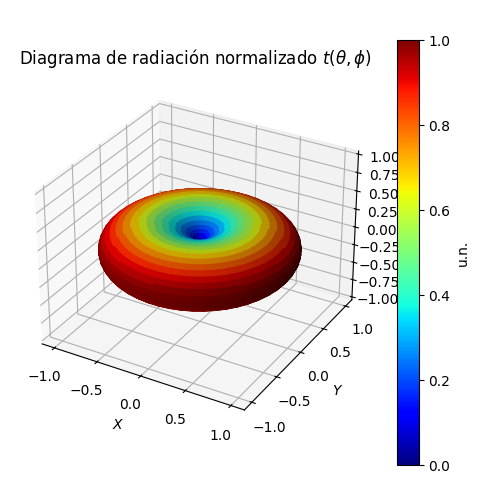

In [3]:
from ftrlearn03 import muestra_respuesta_01
muestra_respuesta_01(X=respuesta_01()[0],Y=respuesta_01()[1],Z=respuesta_01()[2],R=respuesta_01()[3])

## Dipolo elemental inclinado

Se considera un dipolo elemental:
- Centrado en el origen
- Alineado en la dirección $\hat{\bf x}-2\hat{\bf z}$

Se pide Devolver X,Y,Z,R. Siendo X,Y,Z las matrices con las
coordenadas de los nodos de la malla y R el valor de $t(\theta,\phi)$
en cada nodo.

In [4]:
def respuesta_02():
    # Muestras en theta y phi    
    t = np.linspace(0, np.pi, 51)
    p = np.linspace(0, 2*np.pi, 51)
    
    # Edita a partir de aquí
    from numpy import cos, sin, abs, pi, max, arccos
    
    θ,ϕ = np.meshgrid(t,p)
    
    # Calculamos el angulo (otra opción es calcular N_θ y N_ϕ por separado)
    ang = arccos((sin(θ)*cos(ϕ) - 2*cos(θ)) / np.sqrt(5))
    
    # Vector de radiación normalizado
    r = abs(sin(ang))**2

    # Volvemos a pasar a cartesianas
    X = r*sin(θ)*cos(ϕ)
    Y = r*sin(θ)*sin(ϕ)
    Z = r*cos(θ)
    R = r
    
    return X,Y,Z,R

# Ejecuta la celda siguiente para ver un dibujo de tu respuesta

<IPython.core.display.Javascript object>


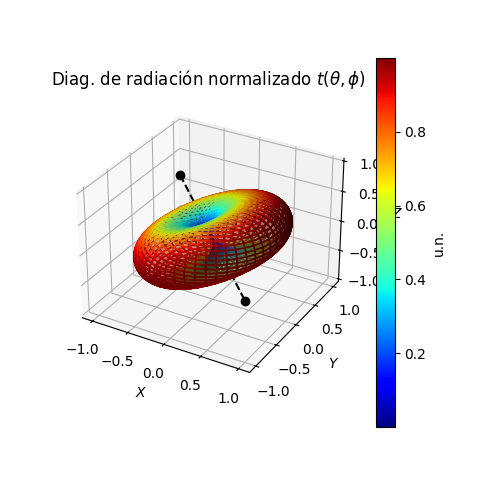

In [5]:
from ftrlearn03 import muestra_respuesta_02
muestra_respuesta_02(X=respuesta_02()[0],Y=respuesta_02()[1],Z=respuesta_02()[2],R=respuesta_02()[3])

## Agrupación de dipolos elementales

Vamos a analizar una agrupación lineal uniforme de 3 dipolos
elementales:
- Cada uno de los elementos de la agrupación está situado paralelo al
  resto, todos ellos paralelos al eje $z$
- El dipolo elemental situado en la mitad de la agrupación está
  centrado en el origen.
- Los centros de los dipolos están equiespaciados una distancia d=0,5λ
  en la dirección $\hat{x}+\hat{y}$
- Devolver X,Y,Z,R_log para poder dibujar su diagrama de radiación
  normalizado.
- En particular R_log ahora vendrá dado en dB relativos al máximo (que
  vale 0 dB) los valores menores a -30 dB se sustituyen por -30
  dB. Finalmente, antes de devolver R_log le sumamos 30 a cada
  elemento de R_log. Así 0 dB queda situado a una distancia de 30
  unidades del origen y -30 dB se representa como una distancia nula.

In [6]:
def respuesta_03():   
    # Muestras de theta y phi para generar la malla
    t = np.linspace(0, np.pi, 51)
    p = np.linspace(0, 2*np.pi, 51)
    
    # Edita a partir de aquí
    from numpy import pi, sqrt, sin, cos, abs, log10
    θ,ϕ = np.meshgrid(t,p)
    N = 3
    kd = pi
    α = 0
    
    ψ = kd * (sin(θ)*cos(ϕ) + sin(θ)*sin(ϕ))/sqrt(2) + α
    FA = 1/N*abs(sum([np.exp(1j*n*ψ) for n in range(N)]))
    
    # El diagrama de radiación es el siguiente
    r = sin(θ) * FA
    
    r[r == 0] = 1.0e-16
    r_log = 20 * log10(r)
    r_log[r_log < -30] = -30
    r_log = r_log + 30
    
    # Volvemos a pasar a cartesianas
    X = r_log*sin(θ)*cos(ϕ)
    Y = r_log*sin(θ)*sin(ϕ)
    Z = r_log*cos(θ)
    R_log = r_log

    return X,Y,Z,R_log

#respuesta_03()
# Ejecuta la celda siguiente para ver un dibujo de tu respuesta

<IPython.core.display.Javascript object>


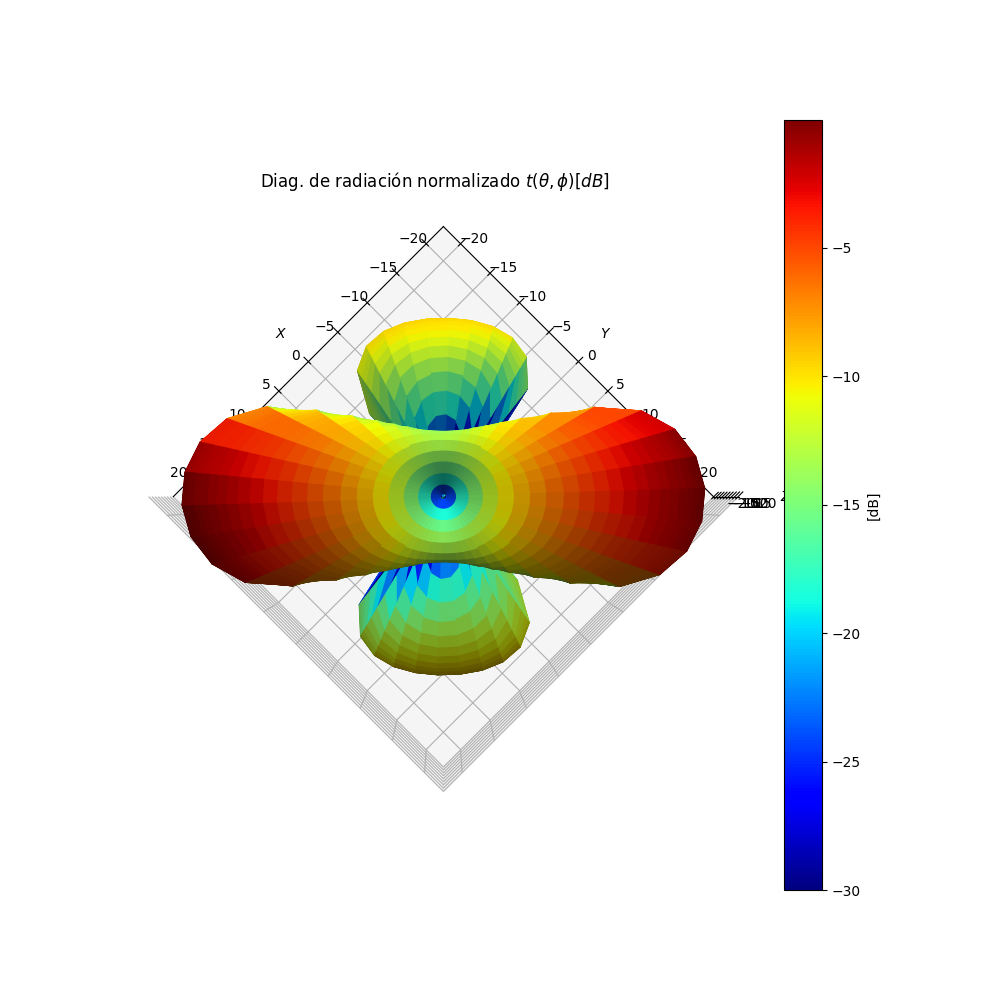

In [7]:
from ftrlearn03 import muestra_respuesta_03
muestra_respuesta_03(X=respuesta_03()[0],Y=respuesta_03()[1],Z=respuesta_03()[2],R_log=respuesta_03()[3])

## Rotación del eje de la agrupación en el plano xy alrededor del eje z

- Tenemos 5 dipolos dipolos elementales paralelos al eje $z$.
- El dipolo central está centrado en el origen y la distancia de
  separación entre los elementos de la agrupación es d=0,5λ.
- Pero ahora los centros de fase de los elementos están ubicados sobre
  una recta contenida en el plano xy que pasa por el origen pero que
  puede rotar empleando como eje de rotación el eje $z$.
- El ángulo que forma dicha recta contra el eje de las $x$ se llamará
  $\alpha$ y ahora las matrices X,Y,Z,R serán funciones de dicho $\alpha$.
- En la celda tras la respuesta hay una celda para crear una
  visualización interactiva y ver así el efecto del cambio de $\alpha$
  en el diagrama.
- R se devuelve normalizado (el máximo vale 1) y en este caso en
  términos de amplitud, no de potencia, para poder ver mejor los
  lóbulos sin llegar a usar logarítmicas.

In [8]:
def respuesta_04():
    # Muestras en theta y phi para crear la malla    
    t = np.linspace(0.01, np.pi, 51)
    p = np.linspace(0.01, 2*np.pi, 51)
    # Edita a partir de aquí
    from numpy import meshgrid, pi, abs, sin, cos, exp
    
    N = 5
    kd = pi
    θ,ϕ = meshgrid(t,p)
    t = sin(θ)
    
    ψ = lambda α: kd*(sin(θ)*cos(ϕ)*cos(α) + sin(θ)*sin(ϕ)*sin(α))
    
    FA = lambda α: 1/N*abs(sum([exp(1j*n*ψ(α)) for n in range(-2, 3)]))
    r = lambda α: t * FA(α)
      
    R=lambda α: r(α)    
    X=lambda α: r(α)*sin(θ)*cos(ϕ)
    Y=lambda α: r(α)*sin(θ)*sin(ϕ)
    Z=lambda α: r(α)*cos(θ)
    
    return X,Y,Z,R

# Ejecuta la siguiente celda para ver un dibujo interactivo con tu respuesta

<IPython.core.display.Javascript object>


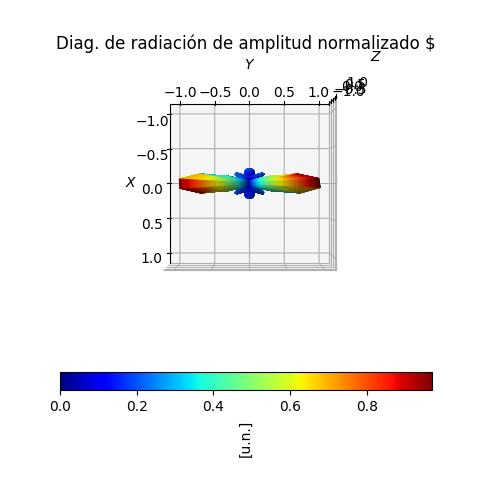

interactive(children=(FloatSlider(value=0.0, description='$alpha$', max=90.0, step=5.0), Output()), _dom_class…

In [9]:
from ftrlearn03 import muestra_rotacion        
muestra_rotacion(X=respuesta_04()[0],Y=respuesta_04()[1],Z=respuesta_04()[2],R=respuesta_04()[3])

## Dipolo de media longitud de onda inclinado

Un dipolo de longitud $\frac{\lambda}{2}$ está:
- Centrado en el origen
- Sobre el plano $yz$, alineado en la dirección $y=z$.
- Devolver X,Y,Z,R para poder dibujar su diagrama de radiación
  normalizado.
- R se devuelve en unidades naturales y en términos de potencia

In [ ]:
def respuesta_05():
    # Muestras en theta y phi para generar la malla
    t = np.linspace(0, np.pi, 51)
    p = np.linspace(0, 2*np.pi, 51)
    # Edita a partir de aquí
    from numpy import meshgrid, pi, abs, sin, cos, exp, arccos, sqrt, max

    θ,ϕ = meshgrid(t,p)
    
    kH = pi/2
    T = arccos((sin(θ)*sin(ϕ)+cos(θ))/sqrt(2))
    
    # fórmula 3.3.27
    P = ((cos(kH*cos(T))-cos(kH))/sin(T))**2
    P_norm = P/max(P)
    
    X = P_norm*sin(θ)*cos(ϕ)
    Y = P_norm*sin(θ)*sin(ϕ)
    Z = P_norm*cos(θ)
    R = P_norm
       
    return X,Y,Z,R
 
muestra_respuesta_01(X=respuesta_05()[0],Y=respuesta_05()[1],Z=respuesta_05()[2],R=respuesta_05()[3])

## Impedancia de entrada de dos dipolos paralelos

Dos dipolos de longitud $\frac{\lambda}{2}$:
- Tienen sus centros sobre el plano $xy$
- Están alineados paralelos al eje $z$
- Están separados una distancia de $0.35\lambda$
- Están alimentados por la misma corriente
- Calcular la impedancia de entrada de cada dipolo

In [ ]:
def respuesta_06():
    π=np.pi
    # Integrales seno y cos. 
    Si=lambda x: sc.sici(x)[0]                                                                                        
    Ci=lambda x: sc.sici(x)[1]

    # Impedancia mutua entre dipolos delgados de media onda
    # paralelos con sus centros a la misma altura y separados
    # una distancia s normalizada respecto a λ, es decir d=s/λ.
    # No emplear una d<1E-5, porque Ci diverge en 0 a -∞
    # Expresión tomada del libro "Antenna Theory" de Balanis
    # edición de 2016, pág.468.   

    R12=lambda d : 30*( 2*Ci(2*π*d)
                         -Ci(2*π*(np.sqrt(d**2+1/4)+1/2))
                         -Ci(2*π*(np.sqrt(d**2+1/4)-1/2)))

    X12=lambda d : -30*( 2*Si(2*π*d)
                          -Si(2*π*(np.sqrt(d**2+1/4)+1/2))
                          -Si(2*π*(np.sqrt(d**2+1/4)-1/2)))

    # Edita a partir de aquí
    d = 0.35
    # Dipolos paralelos recorridos por la misma corriente I1=I2 => z12=z21 (impedancia mutua)   
    Z12 = R12(d) + 1j*X12(d)
    Z21 = Z12
    
    # Calculamos las autoimpedancias, evaluando en un valor muy pequeño, no menor a 1e-5
    Z11 = R12(1e-5)+ 1j*X12(1e-5)
    Z22= Z11
    
    # Ambas impedancias valen lo mismo
    Z1 = Z11 + Z12
    Z2 = Z21 + Z22

    return Z1,Z2

respuesta_06()

## Líneas de fuerza del dipolo elemental

Estas son las expresiones para las componentes del campo E generado
por el potencial vector completo del dipolo elemental que se
demostraron en clase:
$$E_r=\frac{Iℓ}{4\pi}\bigg(\frac{2\eta}{r^2}+\frac{2}{j\omega\epsilon
r^3} \bigg)e^{-jkr}\cos\theta$$ $$ E_\theta=\frac{Iℓ}{4\pi}\bigg(
\frac{jk\eta}{r}+\frac{\eta}{r^2}+\frac{1}{j\omega\epsilon r^3}
\bigg)\, e^{-jkr} \sin\theta $$

Nuestra idea es expresar la distancia y el tiempo en radianes para
ello, todas las $r$ deben ser $kr$ y todas t deben ser $\omega t$,
operando (recordamos que $k=\omega\sqrt{\mu\epsilon}$):
$$E_r=k^2\eta\frac{Iℓ}{2\pi}\bigg(\frac{1}{(kr)^2}-\frac{j}{(k r)^3}
\bigg)e^{-jkr}\cos\theta$$ $$ E_\theta=k^2\eta\frac{Iℓ}{4\pi}\bigg(
\frac{j}{kr}+\frac{1}{(kr)^2}-\frac{j}{(kr)^3} \bigg)\, e^{-jkr}
\sin\theta $$

Ahora ya podemos hacer el cambio deseado. De paso agrupamos constantes
bajo el nombre K: $$R=kr$$ $$T=\omega t$$ $$K=\frac{k^2\eta
Iℓ}{4\pi}$$

Aplicando los cambios anteriores:
$$E_r=2K\bigg(\frac{1}{R^2}-\frac{j}{R^3} \bigg)e^{-jR}\cos\theta$$ $$
E_\theta=K\bigg( \frac{j}{R}+\frac{1}{R^2}-\frac{j}{R^3} \bigg)\,
e^{-jR} \sin\theta $$

La representación temporal del campo eléctrico se consigue a partir de
los fasores tomando la parte real tras multiplicar por $e^{j\omega
t}$: $$e_r=\mathrm{Re}\{E_r e^{jT}\}$$
$$e_\theta=\mathrm{Re}\{E_\theta e^{jT}\}$$

Por otro lado la ecuación diferencial para las líneas de fuerza en
coordenadas polares es: $$\frac{dr}{rd\theta}=\frac{e_r}{e_\theta}$$
dado que el campo es tangente a las líneas de fuerza. En términos de
nuestras coordenadas $R,\theta$:
$$\frac{dR}{Rd\theta}=\frac{e_r}{e_\theta}$$ El objetivo es resolver
dicha ecuación diferencial. Para ello primero hay que sustituir $e_r$
y $e_\theta$, en la ecuación. A continuación nos damos cuenta que se
puede aplicar el método de separación de variables e integramos cada
miembro por separado.  La integral en $\theta$ es inmediata. La
integral en R se puede sacar aplicando lo que vimos el primer
día. Finalmente debemos llegar a una expresión del tipo:
$F(R,T)\sin(\theta)^2=\text{cte}$. Que sería una solución implícita de
la ecuación diferencial. La respuesta debe devolver una función lambda
con $F(R,T)\sin(\theta)^2$ para poder dibujar la función como un mapa
de contorno representando las líneas de fuerza. No hace falta incluir
todo el detalle de las cuentas. Únicamente un comentario resumiendo
cómo se hizo la integral a mano y la función final en la lambda.

In [18]:
def respuesta_07():
    # Edita a partir de aquí
    from numpy import tan, sin, cos, pi, abs
    
    
    # Tras resolver la ecuación diferencial se llega a la siguiente solución    
    lf=lambda R,T,θ: 1/R * sin(θ)**2 * (R*cos(T-R) + sin(T-R))

    
    return(lf)
 
# Ejecuta la siguiente celda para dibujar tu respuesta

<IPython.core.display.Javascript object>


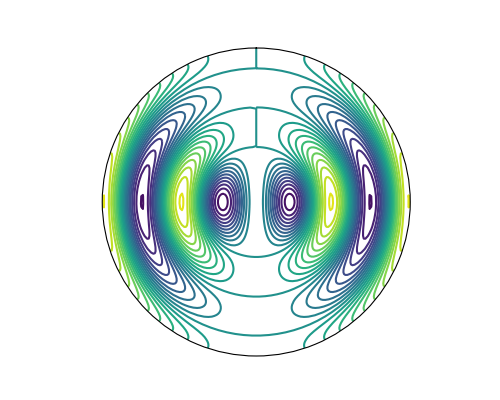

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.001), FloatSlider(…

In [19]:
from ftrlearn03 import muestra_lineas_de_campo_t
muestra_lineas_de_campo_t(respuesta_07())

## Relación entre el área física y el área efectiva de una espira elemental

El radio de una antena tipo espira elemental es
$\lambda/25$. Encontrar la relación entre su área efectiva $A_e$ máxima y su
área física $A_f$: $A_e/A_f$

In [ ]:
def respuesta_08():
    π=np.pi
    # Edita a partir de aquí
    
    # Af de una espira circular es π*r**2
    λ = 1 # Asignamos un valor arbitrario. Realmente la relación pedida no depende de la longitud de onda
    r = λ/25
    Af = π * (r**2)
    
    # Para una espira elemental, si asumimos ganancia cercana a 1, Ae es aprox λ**2 / 4π
    # Sea D la directividad. D = 1.5sin(π/2)**2 = 1.5
    D = 3/2
    Ae = (λ**2) / (4*π) * D
    
    return(Ae/Af)

respuesta_08()